## TUGAS: temukan kembali fungsi asli dengan interpolasi dari titik-titik data acak (y_noisy)

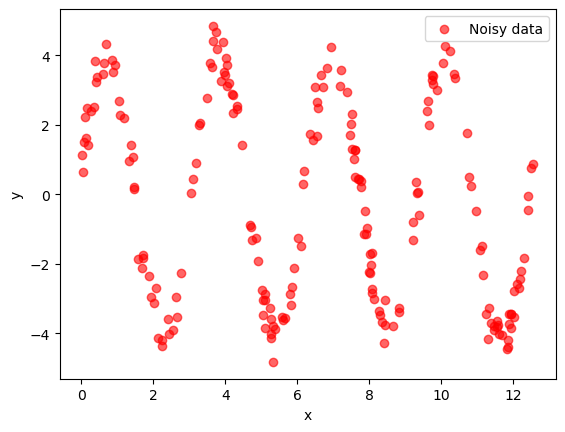

In [43]:
# Nama: Olivia Natasya Yuniar
# NPM: 24083010012

import numpy as np
import matplotlib.pyplot as plt

n = 200
NPM= 12

# Generate random x values between 0 and 4π
np.random.seed(12)
x = np.random.uniform(0, 4*np.pi, n)

# Original function
y_true = 4 * np.sin(2*x + 0.2)

# Add Gaussian noise
noise = np.random.normal(0, 0.4, n)  # mean=0, std=0.5
y_noisy = y_true + noise

# Plot
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)
# plt.plot(np.sort(x), 4*np.sin(4*np.sort(x) + 0.2), label="True function", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


### 1. Menggunakan Metode Polynomial Fitting
Metode ini digunakan untuk mendekati data noisy dengan fungsi polinomial berorde tertentu. Lalu koefisien dihitung menggunakan metode least squares sehingga terjadi error kuadrat terhadap data yang minimum. Jadi semakin tinggi orde polinomial maka hasil fitting biasanya akan mendekati data tetapi akan beresiko mengalami overfitting.

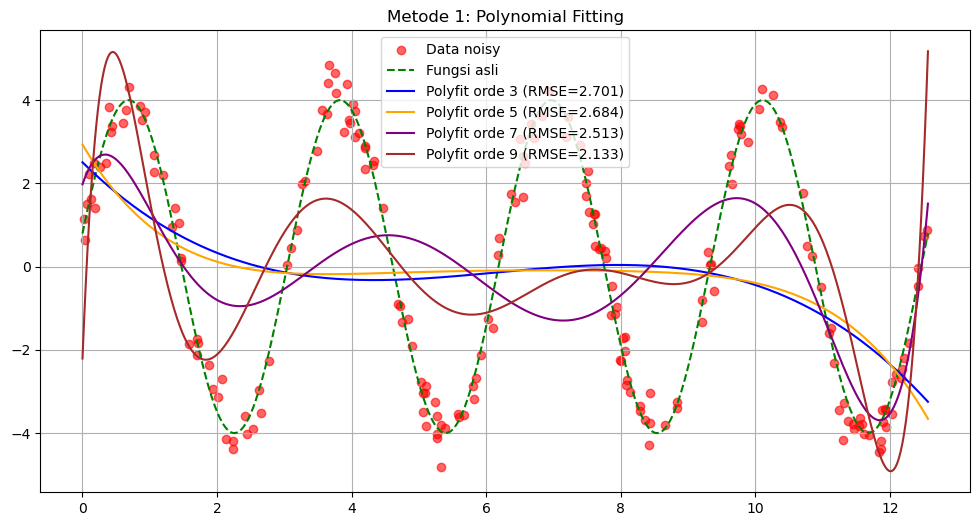

[Polynomial] Orde 3 -> RMSE=2.7006
Koefisien: [-0.01540108  0.28398952 -1.59453906  2.50636496] 

[Polynomial] Orde 5 -> RMSE=2.6840
Koefisien: [-3.76269011e-04  1.19611887e-02 -1.50831159e-01  9.30847055e-01
 -2.75635439e+00  2.93328208e+00] 

[Polynomial] Orde 7 -> RMSE=2.5126
Koefisien: [ 2.29216661e-04 -9.61130007e-03  1.57153268e-01 -1.26115809e+00
  5.10034537e+00 -9.32728159e+00  4.73114456e+00  1.97730516e+00] 

[Polynomial] Orde 9 -> RMSE=2.1334
Koefisien: [ 3.08061207e-05 -1.75383383e-03  4.20022488e-02 -5.49243440e-01
  4.25393309e+00 -1.97601987e+01  5.29574749e+01 -7.35106629e+01
  4.03625118e+01 -2.20789155e+00] 



In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Data
n, NPM = 200, 12
np.random.seed(12)
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4*np.sin(2*x + 0.2)
y_noisy = y_true + np.random.normal(0, 0.4, n)

# Polynomial Fit
degrees = [3, 5, 7, 9]
xx = np.linspace(0, 4*np.pi, 500)
y_true_dense = 4*np.sin(2*xx + 0.2)

results_poly = {}
for d in degrees:
    coeffs = np.polyfit(x, y_noisy, d)
    poly = np.poly1d(coeffs)
    y_fit = poly(xx)
    rmse = np.sqrt(mean_squared_error(y_true_dense, y_fit))
    results_poly[d] = (coeffs, poly, rmse)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y_noisy, color="red", alpha=0.6, label="Data noisy")
plt.plot(xx, y_true_dense, "g--", label="Fungsi asli")
colors = ["blue", "orange", "purple", "brown"]
for d, c in zip(degrees, colors):
    _, poly, rmse = results_poly[d]
    plt.plot(xx, poly(xx), color=c, label=f"Polyfit orde {d} (RMSE={rmse:.3f})")
plt.title("Metode 1: Polynomial Fitting")
plt.legend(); plt.grid(True); plt.show()

# Hasil RMSE dan koefisien
for d in results_poly:
    coeffs, _, rmse = results_poly[d]
    print(f"[Polynomial] Orde {d} -> RMSE={rmse:.4f}")
    print("Koefisien:", coeffs, "\n")


### 2. Menggunakan Metode Spline Fit
Penggunaan metode ini adalah dari potongan-potongan polinomial rendah guna untuk menghubungkan titik pada data. Dengan adanya parameter smoothing, spline dapatdikenadalikan agar lebih halus dan tidak terlalu mengikuti noise. Keunggulannya yaitu adanya stabilitas dan kemampuan mengikuti pola-pola data tanpa harus menggunakan polinomial orde tinggi, sehingga hassil interpolassi yang didapatkan akan lebih natural.

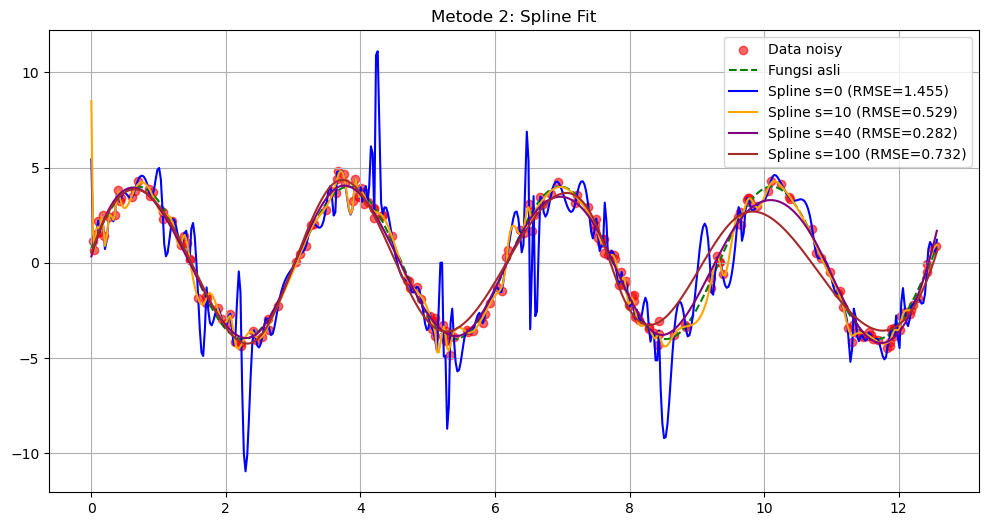

[Spline] s=0 -> RMSE=1.4552
[Spline] s=10 -> RMSE=0.5290
[Spline] s=40 -> RMSE=0.2824
[Spline] s=100 -> RMSE=0.7320


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.interpolate import UnivariateSpline

# Data
n, NPM = 200, 12
np.random.seed(12)
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4*np.sin(2*x + 0.2)
y_noisy = y_true + np.random.normal(0, 0.4, n)

# Sort data untuk spline
idx = np.argsort(x)
x_sorted, y_sorted = x[idx], y_noisy[idx]

# Spline Fit
s_values = [0, 10, 40, 100]
xx = np.linspace(0, 4*np.pi, 500)
y_true_dense = 4*np.sin(2*xx + 0.2)

results_spline = {}
for s in s_values:
    spline = UnivariateSpline(x_sorted, y_sorted, s=s)
    y_fit = spline(xx)
    rmse = np.sqrt(mean_squared_error(y_true_dense, y_fit))
    results_spline[s] = (spline, rmse)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y_noisy, color="red", alpha=0.6, label="Data noisy")
plt.plot(xx, y_true_dense, "g--", label="Fungsi asli")
colors = ["blue", "orange", "purple", "brown"]
for (s, (spline, rmse)), c in zip(results_spline.items(), colors):
    plt.plot(xx, spline(xx), color=c, label=f"Spline s={s} (RMSE={rmse:.3f})")
plt.title("Metode 2: Spline Fit")
plt.legend(); plt.grid(True); plt.show()

# Hasil RMSE
for s in results_spline:
    _, rmse = results_spline[s]
    print(f"[Spline] s={s} -> RMSE={rmse:.4f}")


### 3. Menggunakan Metode Sinusoidal Fit
Sinusiodal digunakan karena fungsi asli berbentuk sinus. Model yang digunakan adalah y=Asin(kx+ϕ)+c, dimana amplitudo, frekuensi, fase, dan offset akan dicari melalui non linear curve fitting. Metode ini paling akurat jika bentuk modelnya akan sesuai dengan fungsi asli sehingga error yang akan didapatkan akan relatif kecil dan hasilnya juga akan mendekati kurva sinus sebelumnya. Tetapi kekurangan dalam menggunakan metode ini adalah memerlukan tebakan awal parameter dan hanya cocok jika pola data benar-benar sinusoidal atau periodik.

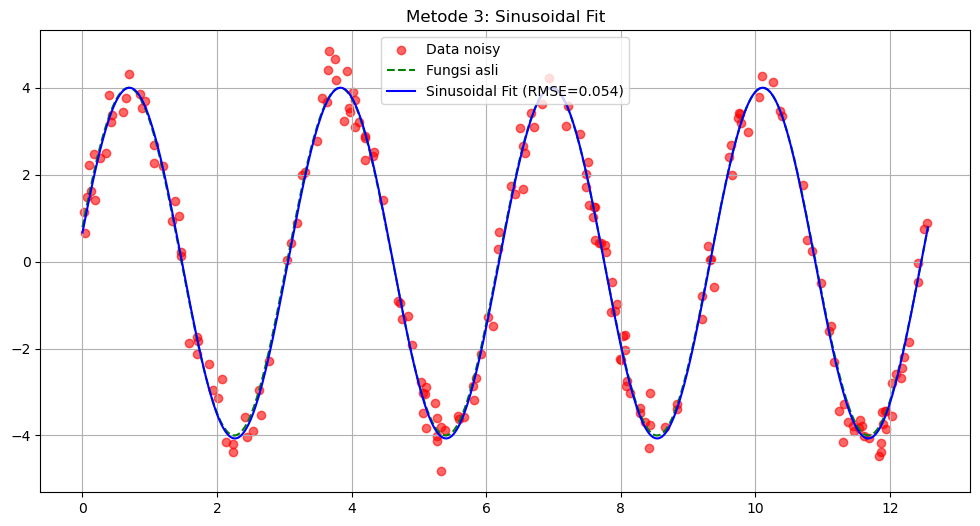

[Sinusoidal] Model: y = 4.036 * sin(2.003x + 0.175) + -0.033
[Sinusoidal] RMSE=0.0539


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

# Data
n, NPM = 200, 12
np.random.seed(12)
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4*np.sin(2*x + 0.2)
y_noisy = y_true + np.random.normal(0, 0.4, n)

# Model sinus
def sinus(x, A, k, phi, c):
    return A*np.sin(k*x + phi) + c

# Fit sinus
params, _ = curve_fit(sinus, x, y_noisy, p0=[4, 2, 0, 0])
A, k, phi, c = params

# Evaluasi
xx = np.linspace(0, 4*np.pi, 500)
y_true_dense = 4*np.sin(2*xx + 0.2)
y_fit = sinus(xx, A, k, phi, c)
rmse = np.sqrt(mean_squared_error(y_true_dense, y_fit))

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y_noisy, color="red", alpha=0.6, label="Data noisy")
plt.plot(xx, y_true_dense, "g--", label="Fungsi asli")
plt.plot(xx, y_fit, "blue", label=f"Sinusoidal Fit (RMSE={rmse:.3f})")
plt.title("Metode 3: Sinusoidal Fit")
plt.legend(); plt.grid(True); plt.show()

# Hasil RMSE dan parameter
print(f"[Sinusoidal] Model: y = {A:.3f} * sin({k:.3f}x + {phi:.3f}) + {c:.3f}")
print(f"[Sinusoidal] RMSE={rmse:.4f}")


# Kesimpulan
Dari ketiga metode diatas, metode yang paling akurat digunakan untuk menyelesaikan permasalahan diatas adalah metode Polinomial Fitting. Meskipun pola data sebenarnya berbentuk sinusoidal, sesuai konteks soal mahasiswa diarahkan untuk menyelesaikan dengan pendekatan polinomial agar dapat memahami konsep interpolasi atau regresi polinomial. Metode polynomial fitting bekerja dengan mencari koefisien polinomial berorde tertentu yang meminimalkan error terhadap data, sehingga dapat menghasilkan fungsi eksplisit berbentuk polinom.